# Generate Note

1. Project is created by Pratik Jain.
2. Some model performance is not shown, as it was taking a lot of time to run, but it was check while building phase, and the performace was not good enough to be shown during the final run.
3. F1 and precision was considered as it makes the most important metrics for fraud detection

## Credit Card Fraud Detection

In this project you will predict fraudulent credit card transactions with the help of Machine learning models. Please import the following libraries to get started.

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn import metrics
from sklearn import preprocessing

import warnings
warnings.filterwarnings("ignore")

In [ ]:
# Importing model building packages
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer

from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier


from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import f1_score, classification_report

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Exploratory data analysis

In [ ]:
df = pd.read_csv('/content/drive/My Drive/creditcard_drive.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
#observe the different feature type present in the data
df.shape

(284807, 31)

In [ ]:
print(df.describe())

                Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  1.168375e-15  3.416908e-16 -1.379537e-15  2.074095e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   9.604066e-16  1.487313e-15 -5.556467e-16  1.213481e-16 -2.406331e-15   
std    1.380247e+00  1.332271e+00  1.23709

In [ ]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [ ]:
# df = df.dropna()
# df.isnull().sum()

Now we have no null values.

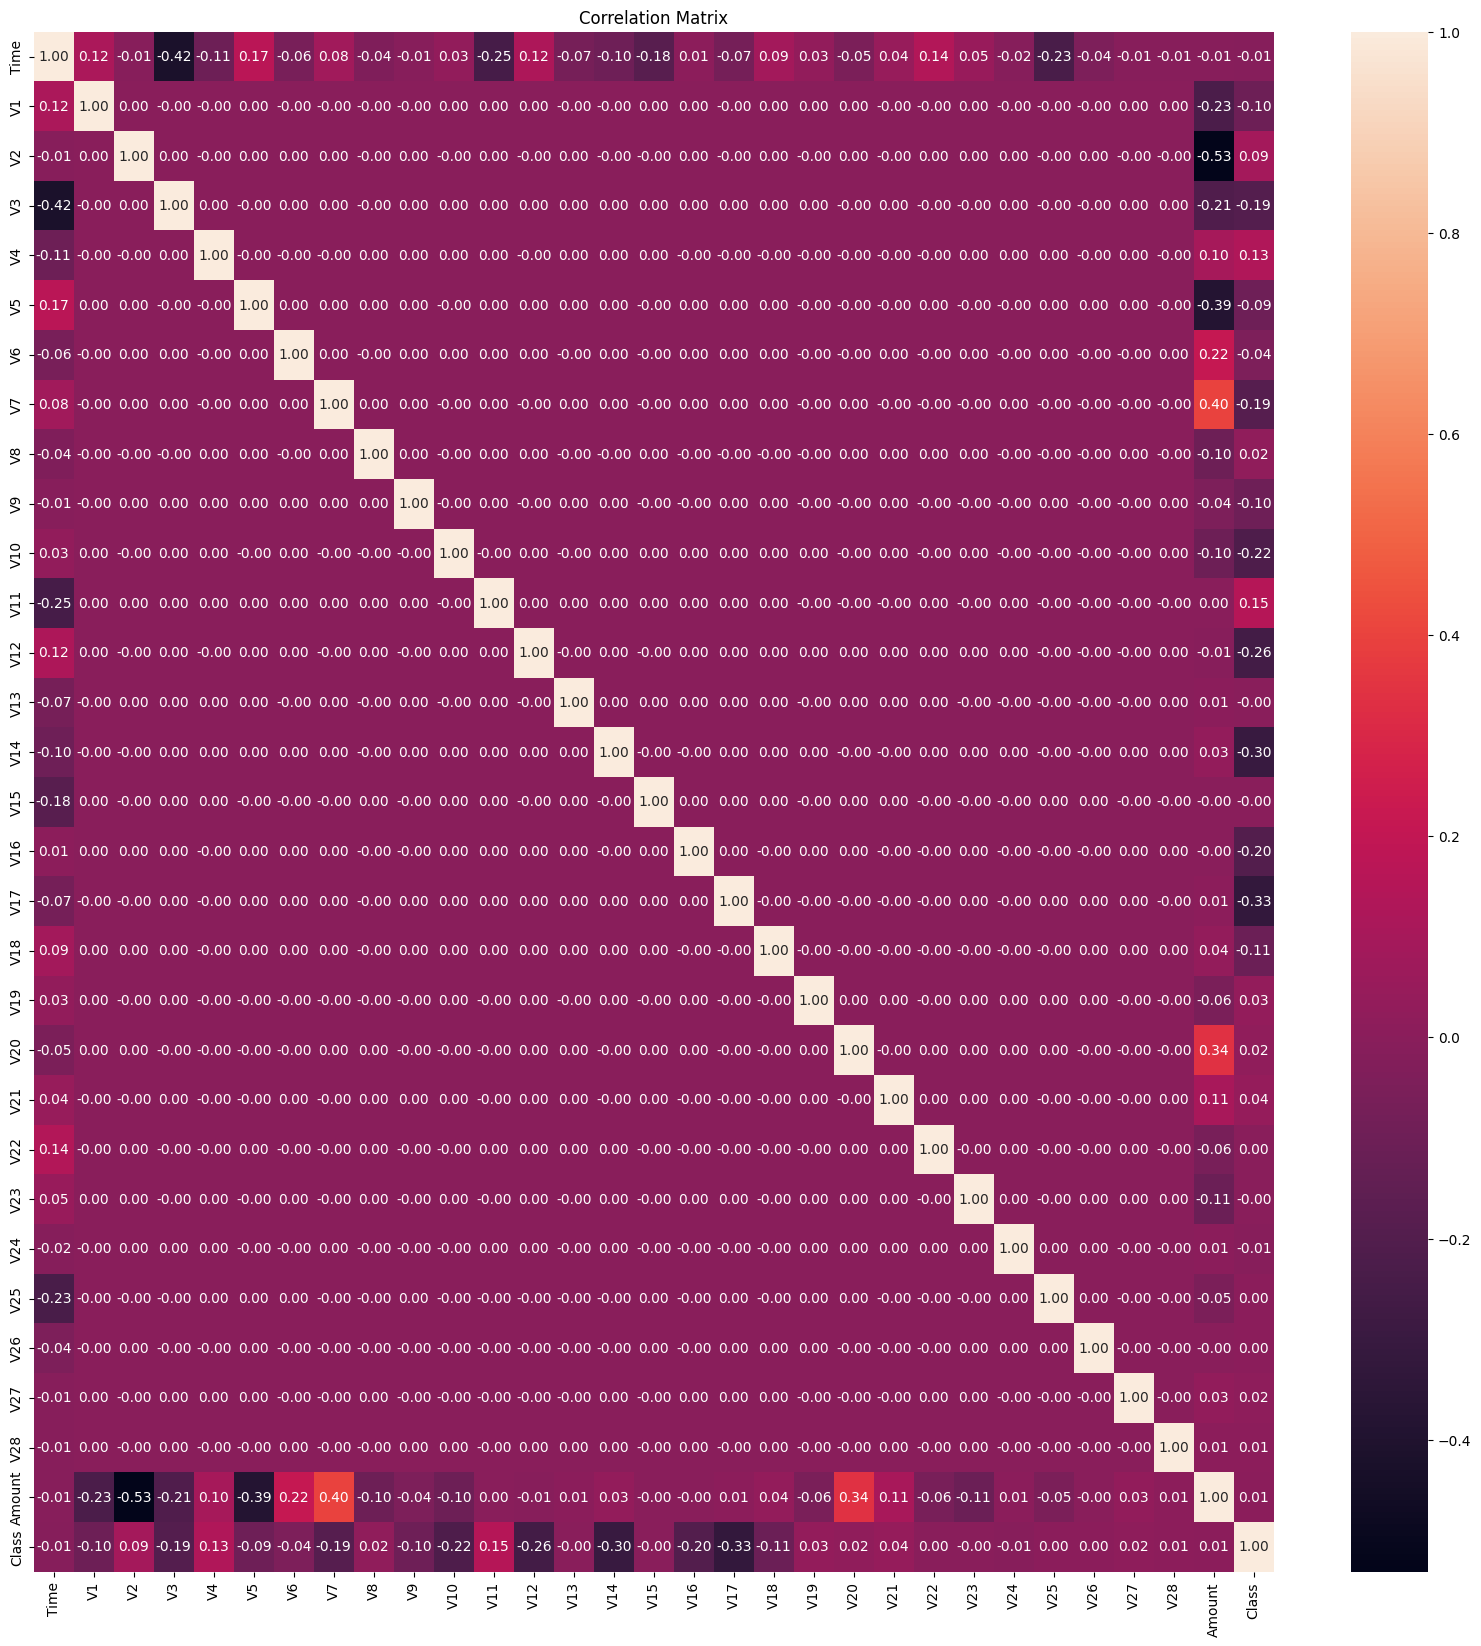

In [ ]:
# EDA: Correlation matrix
correlation_matrix = df.corr()
plt.figure(figsize=(20, 20))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

We have some variables with decent corelation like 0.4, but this might not impact the performance.

Here we will observe the distribution of our classes

In [ ]:
classes=df['Class'].value_counts()
normal_share=classes[0]/df['Class'].count()*100
fraud_share=classes[1]/df['Class'].count()*100
normal_share, fraud_share

(99.82725143693798, 0.1727485630620034)

We already knew it was an unbalanced dataset.

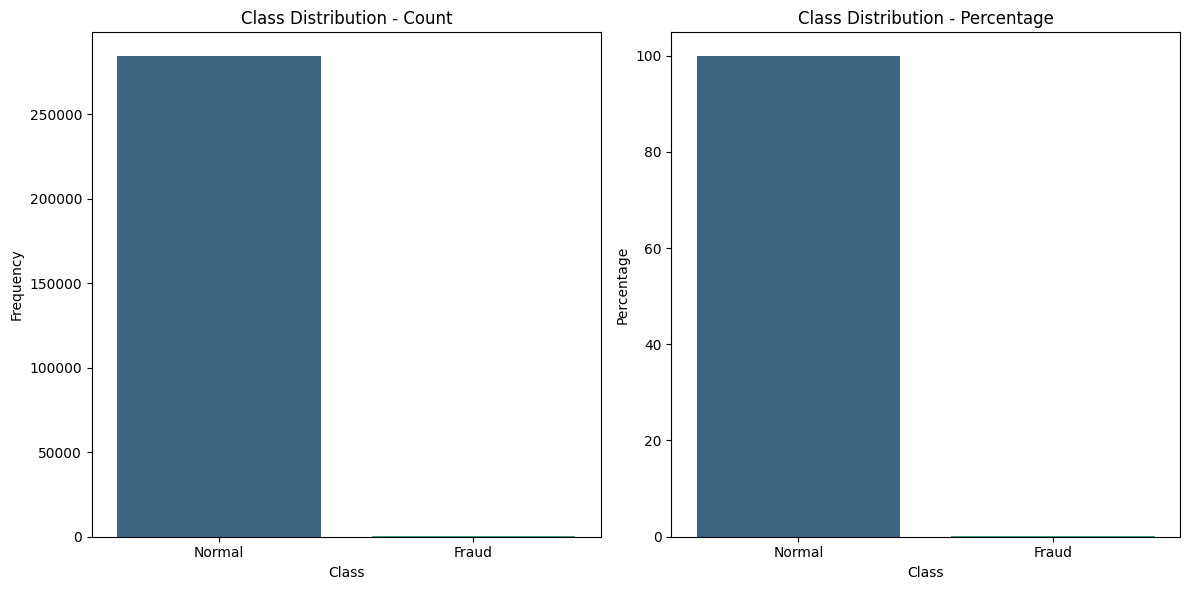

In [ ]:
# Create a bar plot for the number and percentage of fraudulent vs non-fraudulent transcations
plt.figure(figsize=(12, 6))

# Subplot for count
plt.subplot(1, 2, 1)
sns.barplot(x=classes.index, y=classes.values, palette='viridis')
plt.title('Class Distribution - Count')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.xticks([0, 1], ['Normal', 'Fraud'])

# Subplot for percentage
plt.subplot(1, 2, 2)
sns.barplot(x=['Normal', 'Fraud'], y=[normal_share, fraud_share], palette='viridis')
plt.title('Class Distribution - Percentage')
plt.xlabel('Class')
plt.ylabel('Percentage')

plt.tight_layout()
plt.show()

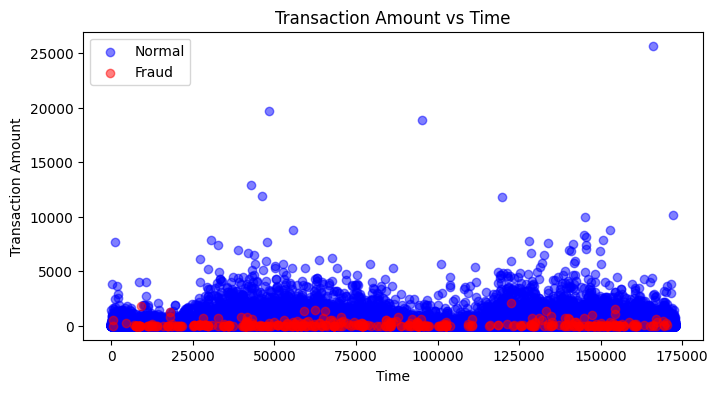

In [ ]:
plt.figure(figsize=(8, 4))

# Scatter plot for normal transactions
plt.scatter(df[df['Class'] == 0]['Time'], df[df['Class'] == 0]['Amount'], alpha=0.5, label='Normal', c='blue')

# Scatter plot for fraudulent transactions
plt.scatter(df[df['Class'] == 1]['Time'], df[df['Class'] == 1]['Amount'], alpha=0.5, label='Fraud', c='red')

plt.title('Transaction Amount vs Time')
plt.xlabel('Time')
plt.ylabel('Transaction Amount')
plt.legend()
plt.show()

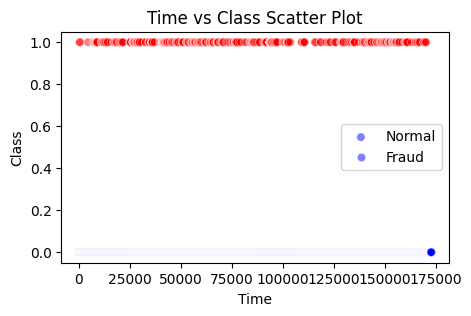

In [ ]:
# Create a scatter plot to observe the distribution of classes with time
plt.figure(figsize=(5, 3))
sns.scatterplot(x='Time', y='Class', data=df, hue='Class', palette=['blue', 'red'], alpha=0.5)
plt.title('Time vs Class Scatter Plot')
plt.xlabel('Time')
plt.ylabel('Class')
plt.legend(['Normal', 'Fraud'])
plt.show()

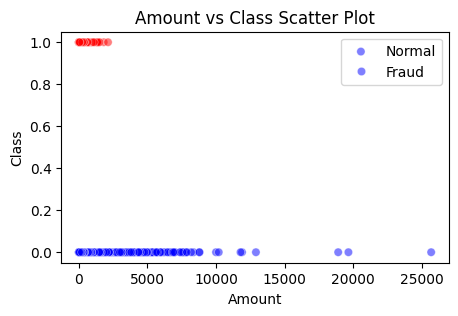

In [ ]:
# Create a scatter plot to observe the distribution of classes with Amount
plt.figure(figsize=(5, 3))
sns.scatterplot(x='Amount', y='Class', data=df, hue='Class', palette=['blue', 'red'], alpha=0.5)
plt.title('Amount vs Class Scatter Plot')
plt.xlabel('Amount')
plt.ylabel('Class')
plt.legend(['Normal', 'Fraud'])
plt.show()

Observation:

Clearly low amount transactions are more likely to be fraudulent than high amount transaction.

Dropping Time column as this feature is not going to help in the model building.

In [ ]:
# Drop unnecessary columns
df = df.drop("Time", axis = 1)

<Figure size 640x480 with 0 Axes>

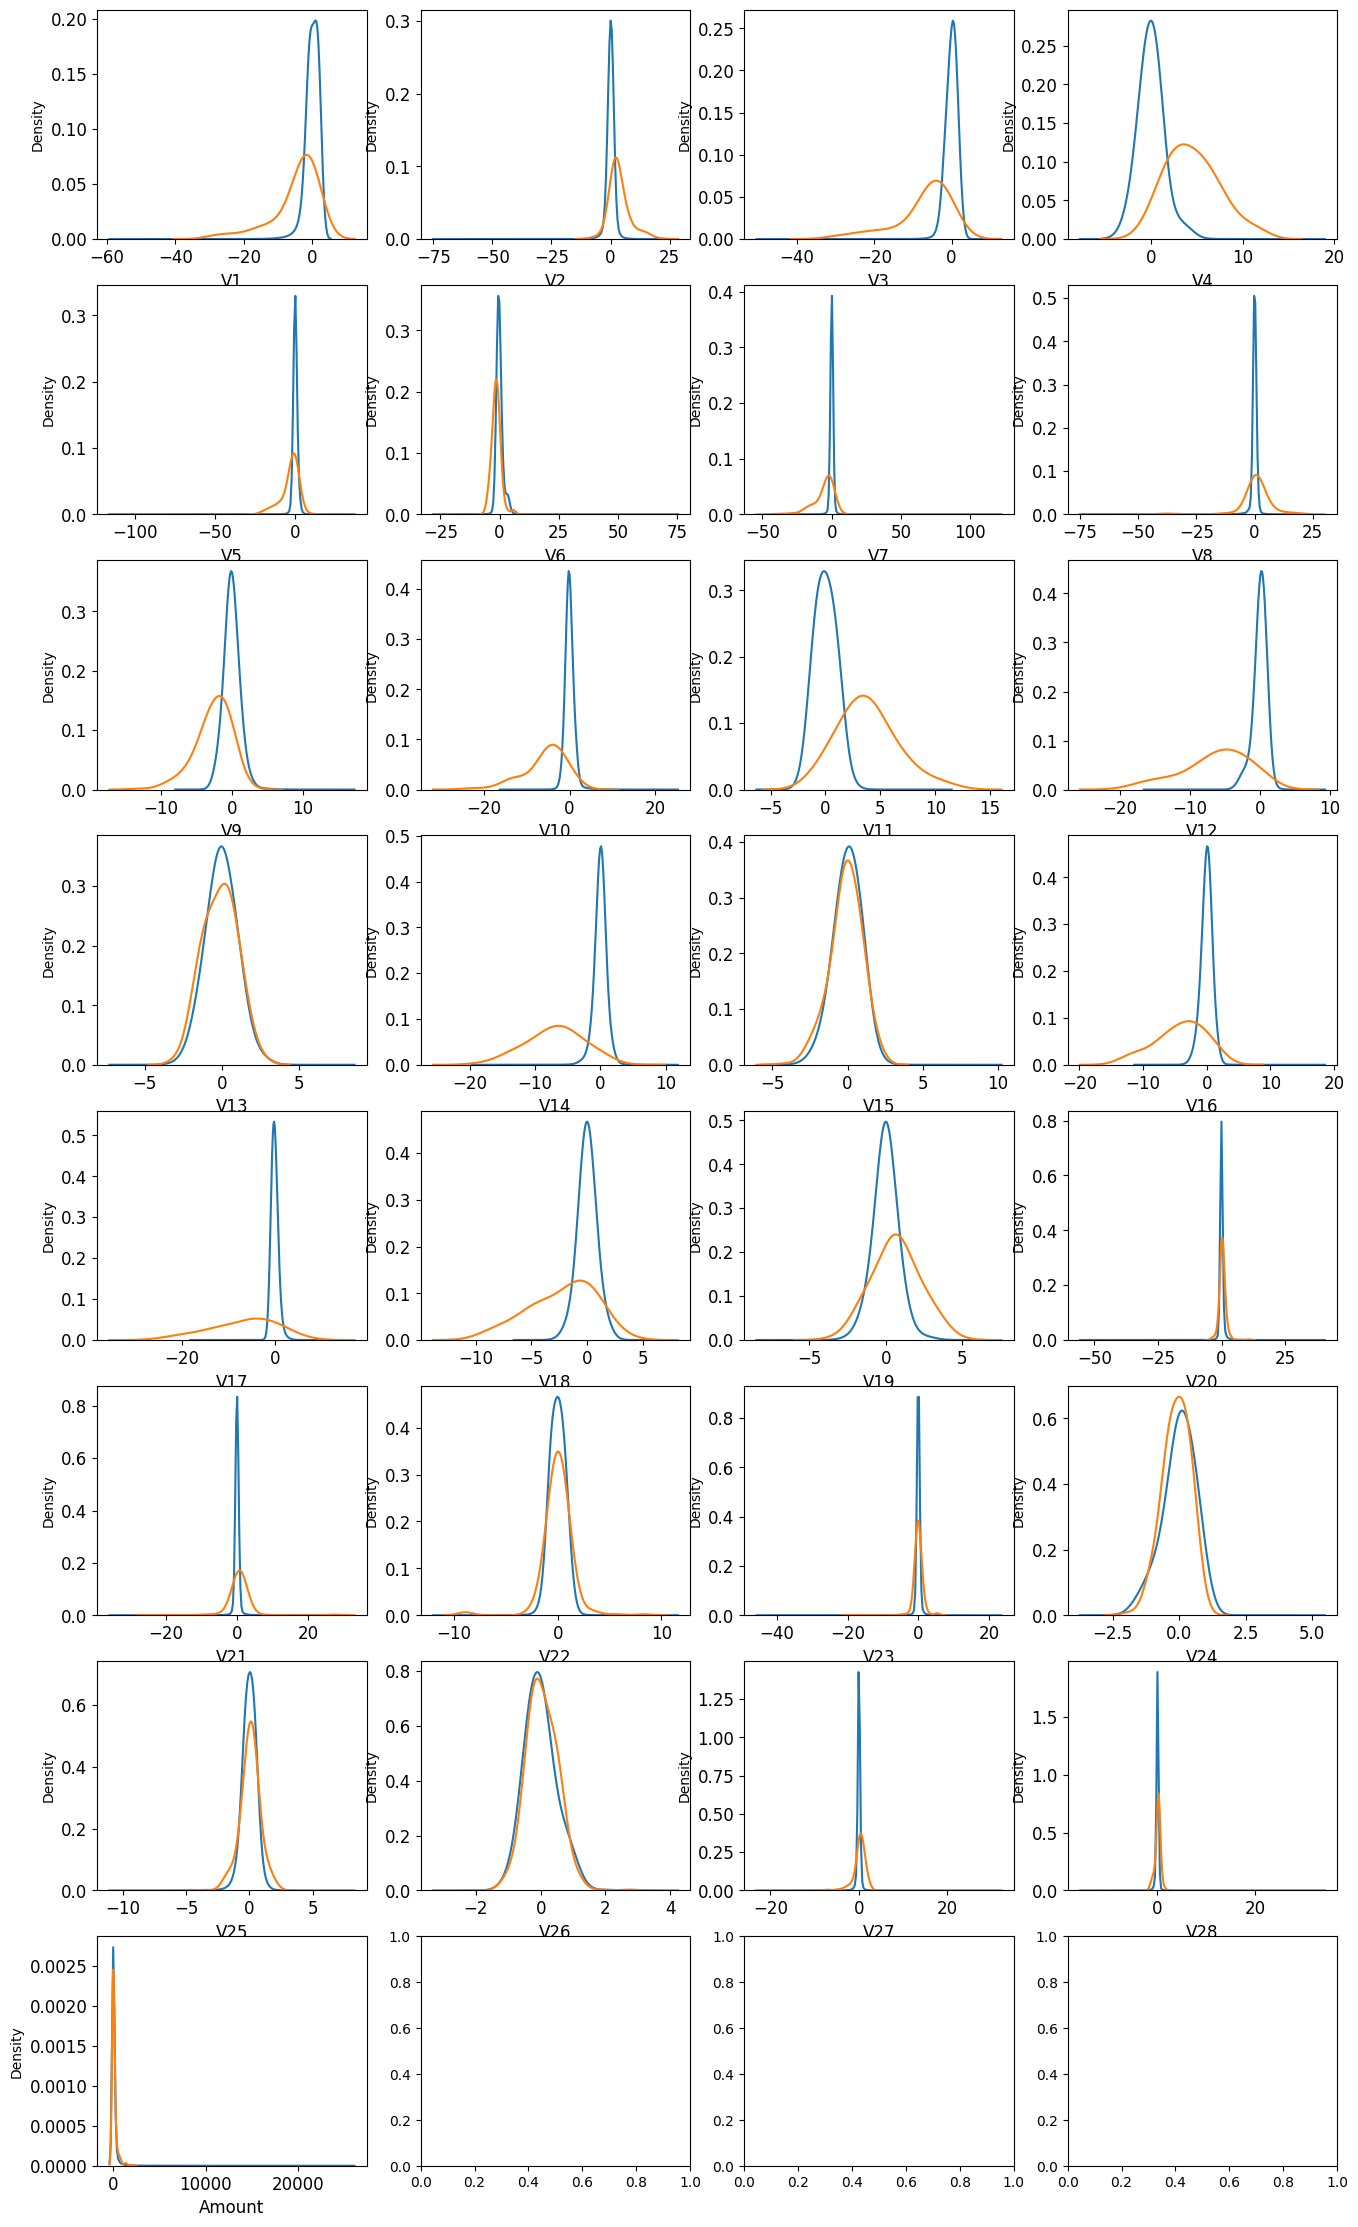

In [ ]:
# Plotting all the variable in displot to visualise the distribution
var = list(df.columns.values)
# dropping Class columns from the list
var.remove("Class")

i = 0
t0 = df.loc[df['Class'] == 0]
t1 = df.loc[df['Class'] == 1]

plt.figure()
fig, ax = plt.subplots(8,4,figsize=(16,28))

for feature in var:
    i += 1
    plt.subplot(8,4,i)
    sns.kdeplot(t0[feature], bw=0.5,label="0")
    sns.kdeplot(t1[feature], bw=0.5,label="1")
    plt.xlabel(feature, fontsize=12)
    locs, labels = plt.xticks()
    plt.tick_params(axis='both', which='major', labelsize=12)
plt.show()

We can see most of the features distributions are overlapping for both the fraud and non-fraud transactions.

### Splitting the data into train & test data

In [ ]:
y = df["Class"]
X = df.drop("Class", axis = 1)

In [ ]:
#from sklearn import model_selection
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Checking the split of the class lable
print(y.value_counts())
print(y_train.value_counts())
print(y_test.value_counts())

Class
0    284315
1       492
Name: count, dtype: int64
Class
0    227451
1       394
Name: count, dtype: int64
Class
0    56864
1       98
Name: count, dtype: int64


##### Preserve X_test & y_test to evaluate on the test data once you build the model

In [ ]:
print(np.sum(y))
print(np.sum(y_train))
print(np.sum(y_test))

492
394
98


In [ ]:
X_train.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
223361,1.955041,-0.380783,-0.315013,0.330155,-0.509374,-0.086197,-0.627978,0.035994,1.054560,-0.030441,...,-0.125390,0.238197,0.968305,0.053208,-0.278602,-0.044999,-0.216780,0.045168,-0.047145,9.99
165061,-0.400975,-0.626943,1.555339,-2.017772,-0.107769,0.168310,0.017959,-0.401619,0.040378,0.611115,...,-0.470372,-0.153485,0.421703,0.113442,-1.004095,-1.176695,0.361924,-0.370469,-0.144792,45.90
238186,0.072509,0.820566,-0.561351,-0.709897,1.080399,-0.359429,0.787858,0.117276,-0.131275,-0.638222,...,0.012227,-0.314638,-0.872959,0.083391,0.148178,-0.431459,0.119690,0.206395,0.070288,11.99
150562,-0.535045,1.014587,1.750679,2.769390,0.500089,1.002270,0.847902,-0.081323,0.371579,0.560595,...,-0.253757,0.063525,0.443431,-0.072754,0.448192,-0.655203,-0.181038,-0.093013,-0.064931,117.44
138452,-4.026938,1.897371,-0.429786,-0.029571,-0.855751,-0.480406,-0.435632,1.313760,0.536044,1.221746,...,-0.012320,-0.480691,-0.230369,0.250717,0.066399,0.470787,0.245335,0.286904,-0.322672,25.76


In [ ]:
# As PCA is already performed on the dataset from V1 to V28 features, we are scaling only Amount field
scaler = StandardScaler()

# Scaling the train data
X_train[["Amount"]] = scaler.fit_transform(X_train[["Amount"]])

# Transforming the test data
X_test[["Amount"]] = scaler.transform(X_test[["Amount"]])

### Plotting the distribution of a variable

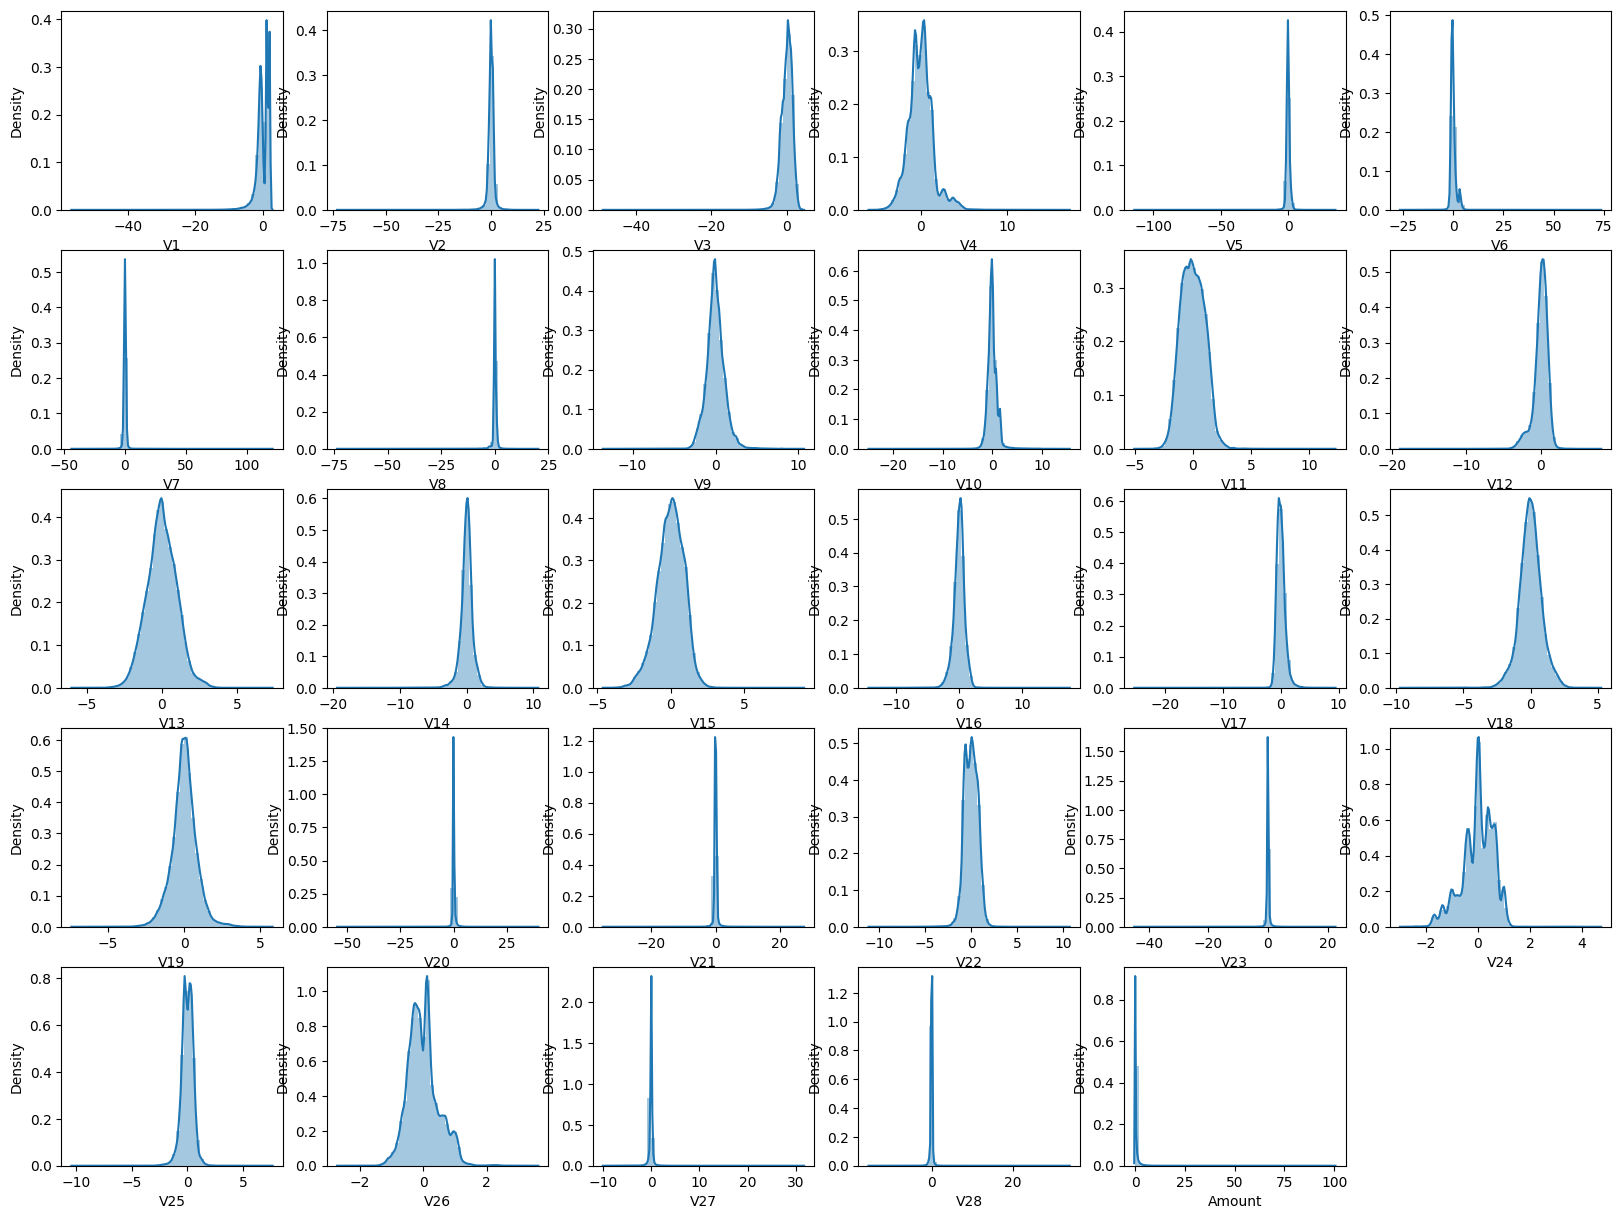

In [ ]:
# plot the histogram of a variable from the dataset to see the skewness
var = X_train.columns

plt.figure(figsize=(20,15))
i=0
for col in var:
    i += 1
    plt.subplot(5,6, i)
    sns.distplot(X_train[col])

plt.show()

Lot of features are highly skewed. So we will check the skewness using skew() and if the skewness is beyond -1 to 1, then we will use power transform to transform the data.

In [ ]:
# Lets check the skewness of the features
var = X_train.columns
skew_list = []
for i in var:
    skew_list.append(X_train[i].skew())

tmp = pd.concat([pd.DataFrame(var, columns=["Features"]), pd.DataFrame(skew_list, columns=["Skewness"])], axis=1)
tmp.set_index("Features", inplace=True)
tmp.T

Features,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Skewness,-3.320269,-4.826847,-2.219375,0.677776,-2.928646,1.977725,3.74462,-8.445014,0.543603,1.212102,...,-1.977859,3.656863,-0.230008,-6.285467,-0.552668,-0.417168,0.579265,-0.03833,11.776522,18.352356


In [ ]:
# Filtering the features which has skewness less than -1 and greater than +1
skewed = tmp.loc[(tmp["Skewness"] > 1) | (tmp["Skewness"] <-1 )].index
print(skewed)

Index(['V1', 'V2', 'V3', 'V5', 'V6', 'V7', 'V8', 'V10', 'V12', 'V14', 'V16',
       'V17', 'V20', 'V21', 'V23', 'V28', 'Amount'],
      dtype='object', name='Features')


### If there is skewness present in the distribution use:
- <b>Power Transformer</b> package present in the <b>preprocessing library provided by sklearn</b> to make distribution more gaussian

In [ ]:
# - Apply : preprocessing.PowerTransformer(copy=False) to fit & transform the train & test data
pt = PowerTransformer(copy=False)

# Fitting the power transformer in train data
X_train[skewed] = pt.fit_transform(X_train[skewed])


# Transforming the test data
X_test[skewed] = pt.transform(X_test[skewed])

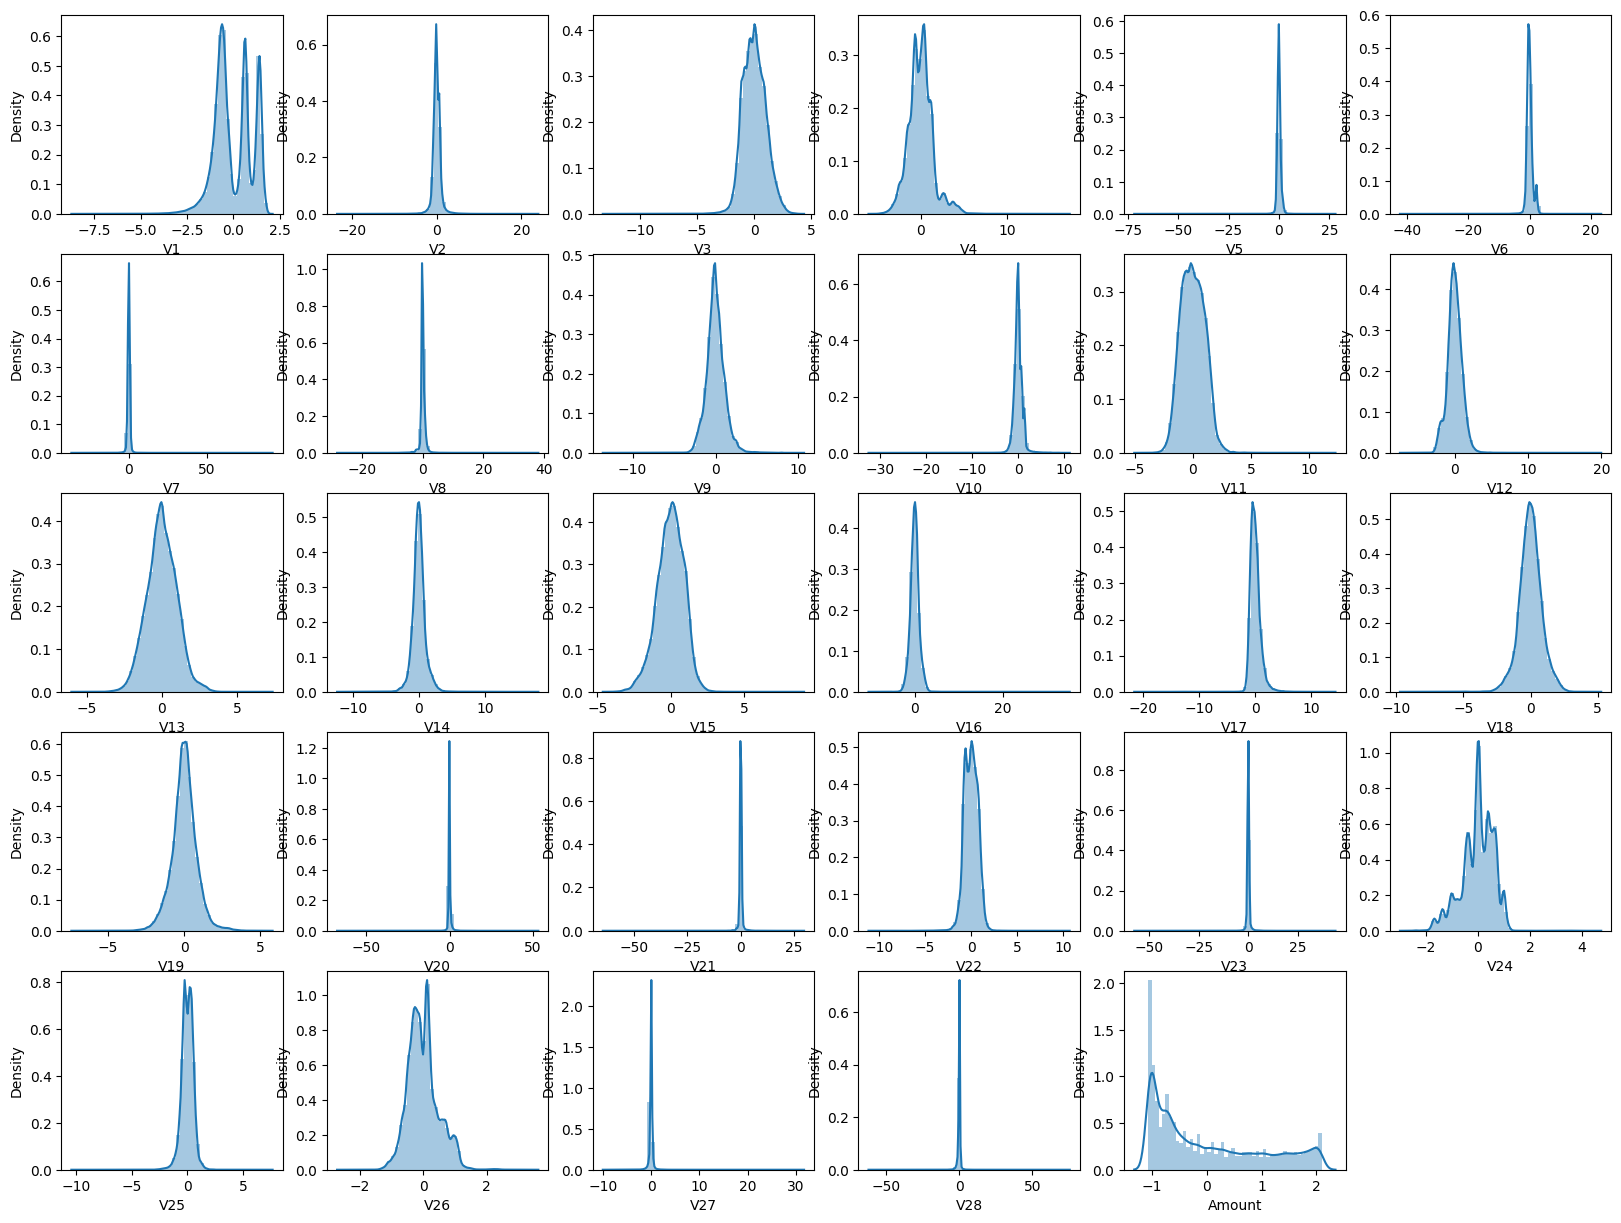

In [ ]:
# plot the histogram of a variable from the dataset again to see the result
var = X_train.columns

plt.figure(figsize=(20,15))
i=0
for col in var:
    i += 1
    plt.subplot(5,6, i)
    sns.distplot(X_train[col])

plt.show()

## Model Building
- Build different models on the imbalanced dataset and see the result

### Logistic Regression

In [ ]:
# Logistic Regression
from sklearn import linear_model
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import classification_report, accuracy_score, precision_recall_fscore_support
 #import the package

num_C = [0.01, 0.1, 1, 10, 100]  #--> list of values
cv_num = 3  #--> list of values

#### perfom cross validation on the X_train & y_train to create:
- X_train_cv
- X_test_cv
- y_train_cv
- y_test_cv

In [ ]:
# ROC Curve function
def draw_roc(actual, probs):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [ ]:
# Create a logistic regression model
model = LogisticRegression(solver='liblinear', random_state=42)

# Set up the hyperparameter grid
param_grid = {'C': num_C}
folds = cv_num

# Perform cross-validation and hyperparameter tuning using GridSearchCV
grid_search = GridSearchCV(model, param_grid, cv=folds, scoring='roc_auc', verbose=1, return_train_score=True)
grid_search.fit(X_train, y_train)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Print the optimum value of hyperparameters
print(f"Optimum value of hyperparameters: {best_params}")
print(f"Best cross-validation score: {best_score}")

# Train the model with the best hyperparameters on the training set
best_model = grid_search.best_estimator_
best_model.fit(X_train, y_train)

# Predict on the test set
y_pred = best_model.predict(X_test)

# Evaluate the model
evaluation_metrics = precision_recall_fscore_support(y_test, y_pred, average='binary')
accuracy = accuracy_score(y_test, y_pred)

print("\nEvaluation metrics:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {evaluation_metrics[0]:.4f}")
print(f"Recall: {evaluation_metrics[1]:.4f}")
print(f"F1 Score: {evaluation_metrics[2]:.4f}")

# Print detailed classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Fitting 3 folds for each of 5 candidates, totalling 15 fits
Optimum value of hyperparameters: {'C': 0.01}
Best cross-validation score: 0.980475035738201

Evaluation metrics:
Accuracy: 0.9991
Precision: 0.8769
Recall: 0.5816
F1 Score: 0.6994

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.88      0.58      0.70        98

    accuracy                           1.00     56962
   macro avg       0.94      0.79      0.85     56962
weighted avg       1.00      1.00      1.00     56962



### Similarly explore other algorithms by building models like:
- KNN
- SVM
- Decision Tree
- Random Forest
- XGBoost

## Function to get model performance
using these functions to reduce writing more code

### Logistic Regreas

In [ ]:
def logistic_regression(X_train, y_train, X_test, y_test):

# Create a logistic regression model
  model = LogisticRegression(solver='liblinear', random_state=42)

  # Set up the hyperparameter grid
  param_grid = {'C': num_C}
  folds = cv_num

  # Perform cross-validation and hyperparameter tuning using GridSearchCV
  grid_search = GridSearchCV(model, param_grid, cv=folds, scoring='roc_auc', verbose=1, return_train_score=True)
  grid_search.fit(X_train, y_train)

  # Get the best parameters and best score
  best_params = grid_search.best_params_
  best_score = grid_search.best_score_

  # Print the optimum value of hyperparameters
  print(f"Optimum value of hyperparameters: {best_params}")
  print(f"Best cross-validation score: {best_score}")

  # Train the model with the best hyperparameters on the training set
  best_model = grid_search.best_estimator_
  best_model.fit(X_train, y_train)

  # Predict on the test set
  y_pred = best_model.predict(X_test)
  y_prob = best_model.predict_proba(X_test)[:, 1]

  # Evaluate the model
  evaluation_metrics = precision_recall_fscore_support(y_test, y_pred, average='binary')
  accuracy = accuracy_score(y_test, y_pred)

  print("\nEvaluation metrics:")
  print(f"Accuracy: {accuracy:.4f}")
  print(f"Precision: {evaluation_metrics[0]:.4f}")
  print(f"Recall: {evaluation_metrics[1]:.4f}")
  print(f"F1 Score: {evaluation_metrics[2]:.4f}")

  # Print detailed classification report
  print("\nClassification Report:")
  print(classification_report(y_test, y_pred))

  #draw_roc(y_test, y_prob)

  return best_model

### KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

def knn_model(X_train, y_train, X_test, y_test):

  # Create a KNN model
  knn_model = KNeighborsClassifier()

  # Set up the hyperparameter grid
  param_grid_knn = {'n_neighbors': [3, 5, 7]}
  folds = cv_num

  # Perform cross-validation and hyperparameter tuning using GridSearchCV
  grid_search_knn = GridSearchCV(knn_model, param_grid_knn, cv=folds, scoring='roc_auc', verbose=3, return_train_score=True)
  grid_search_knn.fit(X_train, y_train)

  # Get the best parameters and best score
  best_params_knn = grid_search_knn.best_params_
  best_score_knn = grid_search_knn.best_score_

  # Print the optimum value of hyperparameters
  print(f"KNN - Optimum value of hyperparameters: {best_params_knn}")
  print(f"KNN - Best cross-validation score: {best_score_knn}")

  # Train the model with the best hyperparameters on the training set
  best_knn_model = grid_search_knn.best_estimator_
  best_knn_model.fit(X_train, y_train)

  # Predict on the test set
  y_pred_knn = best_knn_model.predict(X_test)
  y_prob_knn = best_knn_model.predict_proba(X_test)[:, 1]

  # Evaluate the model
  evaluation_metrics_knn = precision_recall_fscore_support(y_test, y_pred_knn, average='binary')
  accuracy_knn = accuracy_score(y_test, y_pred_knn)

  print("\nKNN Evaluation metrics:")
  print(f"Accuracy: {accuracy_knn:.4f}")
  print(f"Precision: {evaluation_metrics_knn[0]:.4f}")
  print(f"Recall: {evaluation_metrics_knn[1]:.4f}")
  print(f"F1 Score: {evaluation_metrics_knn[2]:.4f}")

  # Print detailed classification report
  print("\nKNN Classification Report:")
  print(classification_report(y_test, y_pred_knn))

  #draw_roc(y_test, y_prob_knn)

  return best_knn_model

### SVM

In [ ]:
from sklearn.svm import SVC

def svm_model(X_train, y_train, X_test, y_test):

  # Create a SVM model
  svm_model = SVC(kernel='linear', random_state=42)

  # Set up the hyperparameter grid
  param_grid_svm = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']}
  folds = cv_num

  # Perform cross-validation and hyperparameter tuning using GridSearchCV
  grid_search_svm = GridSearchCV(svm_model, param_grid_svm, cv=folds, scoring='roc_auc', verbose=1, return_train_score=True)
  grid_search_svm.fit(X_train, y_train)

  # Get the best parameters and best score
  best_params_svm = grid_search_svm.best_params_
  best_score_svm = grid_search_svm.best_score_

  # Print the optimum value of hyperparameters
  print(f"SVM - Optimum value of hyperparameters: {best_params_svm}")
  print(f"SVM - Best cross-validation score: {best_score_svm}")

  # Train the model with the best hyperparameters on the training set
  best_svm_model = grid_search_svm.best_estimator_
  best_svm_model.fit(X_train, y_train)

  # Predict on the test set
  y_pred_svm = best_svm_model.predict(X_test)

  # Evaluate the model
  evaluation_metrics_svm = precision_recall_fscore_support(y_test, y_pred_svm, average='binary')
  accuracy_svm = accuracy_score(y_test, y_pred_svm)

  print("\nSVM Evaluation metrics:")
  print(f"Accuracy: {accuracy_svm:.4f}")
  print(f"Precision: {evaluation_metrics_svm[0]:.4f}")
  print(f"Recall: {evaluation_metrics_svm[1]:.4f}")
  print(f"F1 Score: {evaluation_metrics_svm[2]:.4f}")

  # Print detailed classification report
  print("\nSVM Classification Report:")
  print(classification_report(y_test, y_pred_svm))

  return best_svm_model

### Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

def decision_tree_model(X_train, y_train, X_test, y_test):
  # Create a Decision Tree model
  dt_model = DecisionTreeClassifier(random_state=42)

  # Set up the hyperparameter grid
  param_grid_dt = {'max_depth': [None, 10, 20, 30, 40, 50]}
  folds = cv_num

  # Perform cross-validation and hyperparameter tuning using GridSearchCV
  grid_search_dt = GridSearchCV(dt_model, param_grid_dt, cv=folds, scoring='roc_auc', verbose=1, return_train_score=True)
  grid_search_dt.fit(X_train, y_train)

  # Get the best parameters and best score
  best_params_dt = grid_search_dt.best_params_
  best_score_dt = grid_search_dt.best_score_

  # Print the optimum value of hyperparameters
  print(f"Decision Tree - Optimum value of hyperparameters: {best_params_dt}")
  print(f"Decision Tree - Best cross-validation score: {best_score_dt}")

  # Train the model with the best hyperparameters on the training set
  best_dt_model = grid_search_dt.best_estimator_
  best_dt_model.fit(X_train, y_train)

  # Predict on the test set
  y_pred_dt = best_dt_model.predict(X_test)
  y_prob_dt = best_dt_model.predict_proba(X_test)[:, 1]

  # Evaluate the model
  evaluation_metrics_dt = precision_recall_fscore_support(y_test, y_pred_dt, average='binary')
  accuracy_dt = accuracy_score(y_test, y_pred_dt)

  print("\nDecision Tree Evaluation metrics:")
  print(f"Accuracy: {accuracy_dt:.4f}")
  print(f"Precision: {evaluation_metrics_dt[0]:.4f}")
  print(f"Recall: {evaluation_metrics_dt[1]:.4f}")
  print(f"F1 Score: {evaluation_metrics_dt[2]:.4f}")

  # Print detailed classification report
  print("\nDecision Tree Classification Report:")
  print(classification_report(y_test, y_pred_dt))

  #draw_roc(y_test, y_prob_dt)

### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

def rfc_model(X_train, y_train, X_test, y_test):

  # Create a Random Forest model
  rf_model = RandomForestClassifier(random_state=42)

  # Set up the hyperparameter grid
  param_grid_rf = {
      'n_estimators': [100, 200, 300],
      'max_depth': [None, 10, 20, 30, 40, 50]
  }
  folds = cv_num

  # Perform cross-validation and hyperparameter tuning using GridSearchCV
  grid_search_rf = GridSearchCV(rf_model, param_grid_rf, cv=folds, scoring='roc_auc', verbose=1, return_train_score=True)
  grid_search_rf.fit(X_train, y_train)

  # Get the best parameters and best score
  best_params_rf = grid_search_rf.best_params_
  best_score_rf = grid_search_rf.best_score_

  # Print the optimum value of hyperparameters
  print(f"Random Forest - Optimum value of hyperparameters: {best_params_rf}")
  print(f"Random Forest - Best cross-validation score: {best_score_rf}")

  # Train the model with the best hyperparameters on the training set
  best_rf_model = grid_search_rf.best_estimator_
  best_rf_model.fit(X_train, y_train)

  # Predict on the test set
  y_pred_rf = best_rf_model.predict(X_test)
  y_prob_rf = best_rf_model.predict_proba(X_test)[:, 1]

  # Evaluate the model
  evaluation_metrics_rf = precision_recall_fscore_support(y_test, y_pred_rf, average='binary')
  accuracy_rf = accuracy_score(y_test, y_pred_rf)

  print("\nRandom Forest Evaluation metrics:")
  print(f"Accuracy: {accuracy_rf:.4f}")
  print(f"Precision: {evaluation_metrics_rf[0]:.4f}")
  print(f"Recall: {evaluation_metrics_rf[1]:.4f}")
  print(f"F1 Score: {evaluation_metrics_rf[2]:.4f}")

  # Print detailed classification report
  print("\nRandom Forest Classification Report:")
  print(classification_report(y_test, y_pred_rf))

  return best_rf_model

  #draw_roc(y_test, y_prob_rf)

### XGBoost

In [ ]:
from xgboost import XGBClassifier

def xgb_model(X_train, y_train, X_test, y_test):

  # Create an XGBoost model
  xgb_model = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')

  # Set up the hyperparameter grid
  param_grid_xgb = {
      'n_estimators': [100, 200, 300],
      'max_depth': [3, 6, 9],
      'learning_rate': [0.01, 0.1, 0.2]
  }
  folds = cv_num

  # Perform cross-validation and hyperparameter tuning using GridSearchCV
  grid_search_xgb = GridSearchCV(xgb_model, param_grid_xgb, cv=folds, scoring='roc_auc', verbose=1, return_train_score=True)
  grid_search_xgb.fit(X_train, y_train)

  # Get the best parameters and best score
  best_params_xgb = grid_search_xgb.best_params_
  best_score_xgb = grid_search_xgb.best_score_

  # Print the optimum value of hyperparameters
  print(f"XGBoost - Optimum value of hyperparameters: {best_params_xgb}")
  print(f"XGBoost - Best cross-validation score: {best_score_xgb}")

  # Train the model with the best hyperparameters on the training set
  best_xgb_model = grid_search_xgb.best_estimator_
  best_xgb_model.fit(X_train, y_train)

  # Predict on the test set
  y_pred_xgb = best_xgb_model.predict(X_test)
  y_prob_xgb = best_xgb_model.predict_proba(X_test)[:, 1]

  # Evaluate the model
  evaluation_metrics_xgb = precision_recall_fscore_support(y_test, y_pred_xgb, average='binary')
  accuracy_rf = accuracy_score(y_test, y_pred_xgb)

  print("\nXG Boost Evaluation metrics:")
  print(f"Accuracy: {accuracy_rf:.4f}")
  print(f"Precision: {evaluation_metrics_xgb[0]:.4f}")
  print(f"Recall: {evaluation_metrics_xgb[1]:.4f}")
  print(f"F1 Score: {evaluation_metrics_xgb[2]:.4f}")

  # Print detailed classification report
  print("\nXG Boost Classification Report:")
  print(classification_report(y_test, y_pred_xgb))

  return best_xgb_model

  #draw_roc(y_test, y_prob_xgb)

Note: I ran this script a lot time while building, SVM, knn and rfc takes a lot of time to train. In all the cases dicision tree performce was not good enough, SVM was always over fitting and random forest lags behind xgboost.

If you want to verify, please uncomment and run the code.

In [ ]:
best_logistic_regression = logistic_regression(X_train, y_train, X_test, y_test)
knn_model(X_train, y_train, X_test, y_test)
#best_svm_model = svm_model(X_train, y_train, X_test, y_test)
#decision_tree_model(X_train, y_train, X_test, y_test)
#rfc_model(X_train, y_#train, X_test, y_test)
best_xgb_model = xgb_model(X_train, y_train, X_test, y_test)

Fitting 3 folds for each of 5 candidates, totalling 15 fits
Optimum value of hyperparameters: {'C': 0.01}
Best cross-validation score: 0.980475035738201

Evaluation metrics:
Accuracy: 0.9991
Precision: 0.8769
Recall: 0.5816
F1 Score: 0.6994

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.88      0.58      0.70        98

    accuracy                           1.00     56962
   macro avg       0.94      0.79      0.85     56962
weighted avg       1.00      1.00      1.00     56962

Fitting 3 folds for each of 3 candidates, totalling 9 fits
[CV 1/3] END .n_neighbors=3;, score=(train=1.000, test=0.909) total time= 1.1min
[CV 2/3] END .n_neighbors=3;, score=(train=1.000, test=0.908) total time= 1.1min
[CV 3/3] END .n_neighbors=3;, score=(train=1.000, test=0.927) total time= 1.1min
[CV 1/3] END .n_neighbors=5;, score=(train=1.000, test=0.909) total time= 1.1min
[CV 2/3] END .n_neighbors

#### Proceed with the model which shows the best result
- Apply the best hyperparameter on the model
- Predict on the test dataset

XGB is the best model, with best score and high f1. Also it not overfitting a lot.

In [ ]:
# clf =  XGBClassifier(learning_rate= 0.1, max_depth= 6, n_estimators= 100, random_state=42, use_label_encoder=False, eval_metric='logloss')#initialise the model with optimum hyperparameters
# clf.fit(X_train, y_train)
clf = best_xgb_model
y_pred_xgb = clf.predict(X_test)
# Evaluate the model
evaluation_metrics_xgb = precision_recall_fscore_support(y_test, y_pred_xgb, average='binary')
accuracy_clf = accuracy_score(y_test, y_pred_xgb)
print("\nXG Boost Evaluation metrics:")
print(f"Accuracy: {accuracy_clf:.4f}")
print(f"Precision: {evaluation_metrics_xgb[0]:.4f}")
print(f"Recall: {evaluation_metrics_xgb[1]:.4f}")
print(f"F1 Score: {evaluation_metrics_xgb[2]:.4f}")
# Print detailed classification report
print("\nXG Boost Classification Report:")
print(classification_report(y_test, y_pred_xgb))


XG Boost Evaluation metrics:
Accuracy: 0.9996
Precision: 0.9630
Recall: 0.7959
F1 Score: 0.8715

XG Boost Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.96      0.80      0.87        98

    accuracy                           1.00     56962
   macro avg       0.98      0.90      0.94     56962
weighted avg       1.00      1.00      1.00     56962



### Print the important features of the best model to understand the dataset
- This will not give much explanation on the already transformed dataset
- But it will help us in understanding if the dataset is not PCA transformed

Top var = 14
2nd Top var = 7
3rd Top var = 10


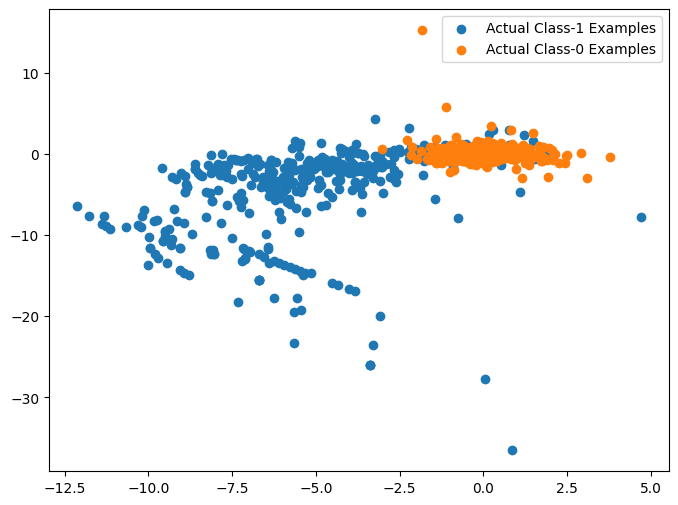

In [ ]:
var_imp = []
for i in clf.feature_importances_:
    var_imp.append(i)
print('Top var =', var_imp.index(np.sort(clf.feature_importances_)[-1])+1)
print('2nd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-2])+1)
print('3rd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-3])+1)

# Variable on Index-16 and Index-13 seems to be the top 2 variables
top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-1])
second_top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-2])

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]

np.random.shuffle(X_train_0)

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [8, 6]

plt.scatter(X_train_1[:, top_var_index], X_train_1[:, second_top_var_index], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], top_var_index], X_train_0[:X_train_1.shape[0], second_top_var_index],
            label='Actual Class-0 Examples')
plt.legend()

## Model building with balancing Classes

##### Perform class balancing with :
- Random Oversampling
- SMOTE
- ADASYN

## Model Building
- Build different models on the balanced dataset and see the result

In [ ]:
# # Logistic Regression
# from sklearn import linear_model #import the package

# num_C = #--> list of values
# cv_num =   #--> list of values

#### perfom cross validation on the X_train & y_train to create:
- X_train_cv
- X_test_cv
- y_train_cv
- y_test_cv

### Random Oversampling

In [ ]:
from imblearn.over_sampling import RandomOverSampler
from collections import Counter
 #- import the packages
oversample = RandomOverSampler(sampling_strategy='minority')
# fit and apply the transform
X_over, y_over = oversample.fit_resample(X_train, y_train)

# Befor sampling class distribution
print('Before sampling class distribution:-',Counter(y_train))
# new class distribution
print('New class distribution:-',Counter(y_over))

#perform cross validation & then balance classes on X_train_cv & y_train_cv using Random Oversampling
#perform hyperparameter tuning
#print the evaluation result by choosing a evaluation metric
#print the optimum value of hyperparameters


Before sampling class distribution:- Counter({0: 227451, 1: 394})
New class distribution:- Counter({0: 227451, 1: 227451})


### Similarly explore other algorithms on balanced dataset by building models like:
- KNN
- SVM
- Decision Tree
- Random Forest
- XGBoost

### Running all models to get performance

Won't run SVM and random forest and decision tree, because of high run time. And xgboost being better suited for the given case

In [ ]:
best_logistic_regression = logistic_regression(X_over, y_over, X_test, y_test)
best_knn_model = knn_model(X_over, y_over, X_test, y_test)
#svm_model(X_over, y_over, X_test, y_test)
#decision_tree_model(X_over, y_over, X_test, y_test)
#rfc_model(X_over, y_over, X_test, y_test)
best_xgb_model = xgb_model(X_over, y_over, X_test, y_test)

Fitting 3 folds for each of 5 candidates, totalling 15 fits
Optimum value of hyperparameters: {'C': 100}
Best cross-validation score: 0.9866778488322899

Evaluation metrics:
Accuracy: 0.9730
Precision: 0.0556
Recall: 0.9184
F1 Score: 0.1049

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.97      0.99     56864
           1       0.06      0.92      0.10        98

    accuracy                           0.97     56962
   macro avg       0.53      0.95      0.55     56962
weighted avg       1.00      0.97      0.98     56962

Fitting 3 folds for each of 3 candidates, totalling 9 fits
[CV 1/3] END .n_neighbors=3;, score=(train=1.000, test=1.000) total time= 4.5min
[CV 2/3] END .n_neighbors=3;, score=(train=1.000, test=1.000) total time= 4.5min
[CV 3/3] END .n_neighbors=3;, score=(train=1.000, test=1.000) total time= 4.5min
[CV 1/3] END .n_neighbors=5;, score=(train=1.000, test=1.000) total time= 4.7min
[CV 2/3] END .n_neighbors

In [ ]:
# #Best Model
# clf =  XGBClassifier(learning_rate= 0.1, max_depth= 6, n_estimators= 100, random_state=42, use_label_encoder=False, eval_metric='logloss')#initialise the model with optimum hyperparameters
# clf.fit(X_over, y_over)
clf = best_xgb_model
y_pred_xgb = clf.predict(X_test)
# Evaluate the model
evaluation_metrics_xgb = precision_recall_fscore_support(y_test, y_pred_xgb, average='binary')
accuracy_clf = accuracy_score(y_test, y_pred_xgb)
print("\nXG Boost Evaluation metrics:")
print(f"Accuracy: {accuracy_clf:.4f}")
print(f"Precision: {evaluation_metrics_xgb[0]:.4f}")
print(f"Recall: {evaluation_metrics_xgb[1]:.4f}")
print(f"F1 Score: {evaluation_metrics_xgb[2]:.4f}")
# Print detailed classification report
print("\nXG Boost Classification Report:")
print(classification_report(y_test, y_pred_xgb))


XG Boost Evaluation metrics:
Accuracy: 0.9997
Precision: 0.9762
Recall: 0.8367
F1 Score: 0.9011

XG Boost Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.98      0.84      0.90        98

    accuracy                           1.00     56962
   macro avg       0.99      0.92      0.95     56962
weighted avg       1.00      1.00      1.00     56962



### Print the class distribution after applying SMOTE

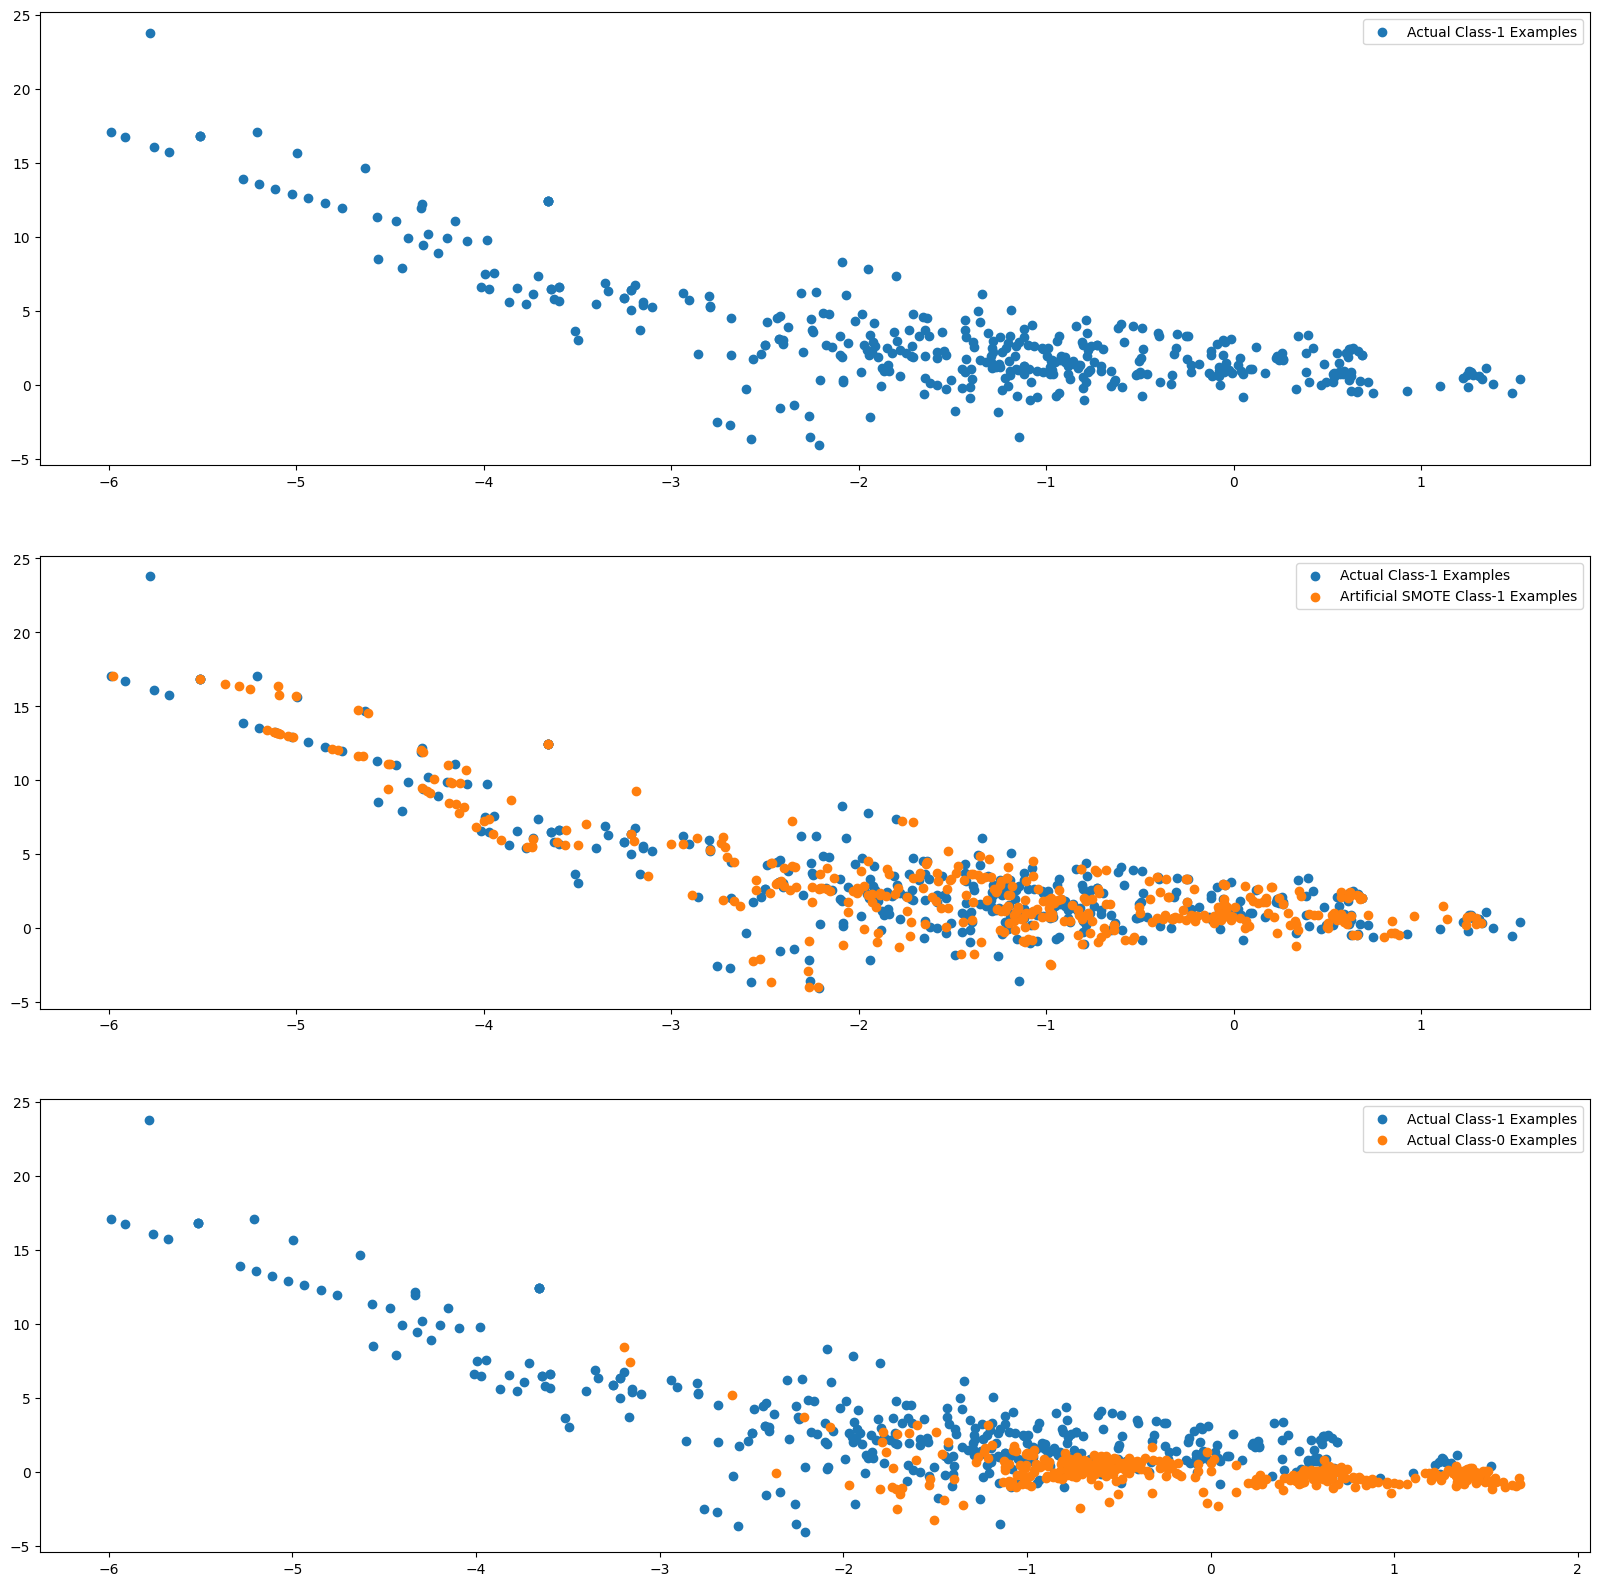

In [ ]:
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from imblearn import over_sampling

warnings.filterwarnings("ignore")

# Assuming X_train and y_train are already defined
sm = over_sampling.SMOTE(random_state=0)
X_train_smote, y_train_smote = sm.fit_resample(X_train, y_train)

# Convert to numpy arrays for easier indexing
X_train_smote = X_train_smote.to_numpy()
X_train = X_train.to_numpy()
y_train = y_train.to_numpy()

# Artificial minority samples and corresponding minority labels from SMOTE
X_train_smote_1 = X_train_smote[X_train.shape[0]:]

# Actual minority and majority class samples
X_train_1 = X_train[np.where(y_train == 1.0)]
X_train_0 = X_train[np.where(y_train == 0.0)]

# Plotting
plt.rcParams['figure.figsize'] = [20, 20]
fig = plt.figure()

plt.subplot(3, 1, 1)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 2)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_smote_1[:X_train_1.shape[0], 0], X_train_smote_1[:X_train_1.shape[0], 1],
            label='Artificial SMOTE Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 3)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], 0], X_train_0[:X_train_1.shape[0], 1], label='Actual Class-0 Examples')
plt.legend()

plt.show()

### Running all models to get performance

In [ ]:
# best_logistic_regression = logistic_regression(X_train_smote, y_train_smote, X_test, y_test)
# best_knn_model = knn_model(X_train_smote, y_train_smote, X_test, y_test)
# #svm_model(X_train_smote, y_train_smote, X_test, y_test)
# #decision_tree_model(X_train_smote, y_train_smote, X_test, y_test)
# #rfc_model(X_train_smote, y_train_smote, X_test, y_test)
# best_xgb_model = xgb_model(X_train_smote, y_train_smote, X_test, y_test)

##### Build models on other algorithms to see the better performing on SMOTE

### Print the class distribution after applying ADASYN

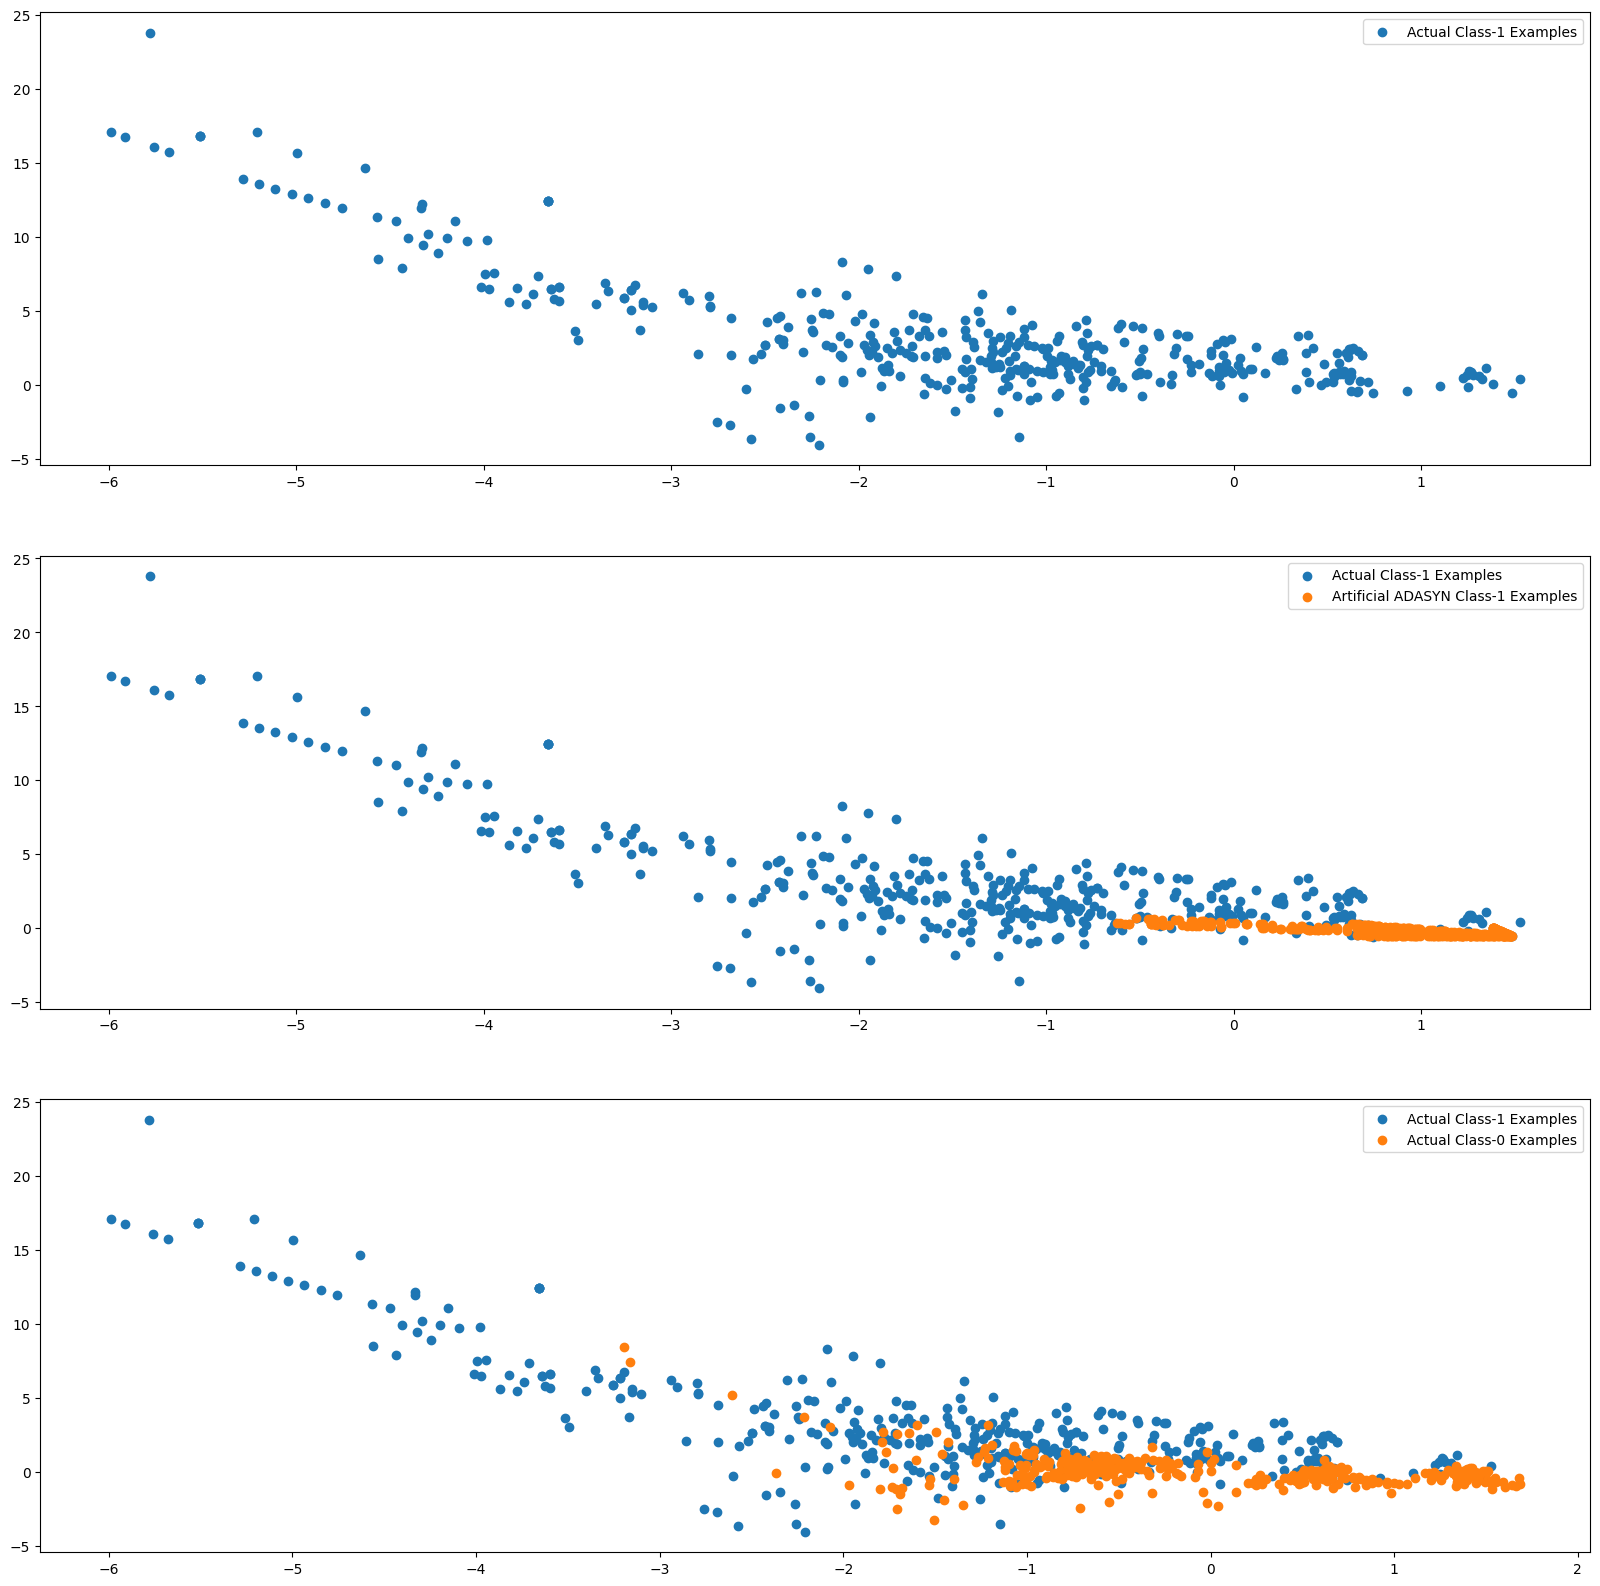

In [ ]:
import warnings
warnings.filterwarnings("ignore")

from imblearn import over_sampling

ada = over_sampling.ADASYN(random_state=0)
X_train_adasyn, y_train_adasyn = ada.fit_resample(X_train, y_train)
# Artificial minority samples and corresponding minority labels from ADASYN are appended
# below X_train and y_train respectively
# So to exclusively get the artificial minority samples from ADASYN, we do
X_train_adasyn_1 = X_train_adasyn[X_train.shape[0]:]

X_train_1 = X_train[np.where(y_train==1.0)]
X_train_0 = X_train[np.where(y_train==0.0)]



import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]
fig = plt.figure()

plt.subplot(3, 1, 1)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 2)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_adasyn_1[:X_train_1.shape[0], 0], X_train_adasyn_1[:X_train_1.shape[0], 1],
            label='Artificial ADASYN Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 3)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], 0], X_train_0[:X_train_1.shape[0], 1], label='Actual Class-0 Examples')
plt.legend()

### Running all models to get performance

In [ ]:
# best_logistic_regression = logistic_regression(X_train_adasyn, y_train_adasyn, X_test, y_test)
# best_knn_model = knn_model(X_train_adasyn, y_train_adasyn, X_test, y_test)
# svm_model(X_train_adasyn, y_train_adasyn, X_test, y_test)
# decision_tree_model(X_train_adasyn, y_train_adasyn, X_test, y_test)
# rfc_model(X_train_adasyn, y_train_adasyn, X_test, y_test)
# best_xgb_model = xgb_model(X_train_adasyn, y_train_adasyn, X_test, y_test)

## Running all Model in parallel

In [ ]:
import concurrent.futures
def run_models_in_parallel(X_train_smote, y_train_smote, X_train_adasyn, y_train_adasyn, X_test, y_test):
    with concurrent.futures.ThreadPoolExecutor() as executor:
        futures = {
            executor.submit(logistic_regression, X_train_smote, y_train_smote, X_test, y_test): 'Logistic Regression Smote',
            executor.submit(knn_model, X_train_smote, y_train_smote, X_test, y_test): 'KNN Smote',
            executor.submit(xgb_model, X_train_smote, y_train_smote, X_test, y_test): 'XGBoost Smote',
            executor.submit(logistic_regression, X_train_adasyn, y_train_adasyn, X_test, y_test): 'Logistic Regression ADASYN',
            executor.submit(knn_model, X_train_adasyn, y_train_adasyn, X_test, y_test): 'KNN ADASYN',
            executor.submit(xgb_model, X_train_adasyn, y_train_adasyn, X_test, y_test): 'XGBoost ADASYN'
        }

        models = []
        for future in concurrent.futures.as_completed(futures):
            model_name = futures[future]
            try:
                model = future.result()
                models.append((model_name, model))
            except Exception as exc:
                print(f'{model_name} generated an exception: {exc}')

    return models

In [ ]:
models = run_models_in_parallel(X_train_smote, y_train_smote, X_train_adasyn, y_train_adasyn, X_test, y_test)

Fitting 3 folds for each of 5 candidates, totalling 15 fits
Fitting 3 folds for each of 3 candidates, totalling 9 fits
Fitting 3 folds for each of 5 candidates, totalling 15 fitsFitting 3 folds for each of 27 candidates, totalling 81 fits

Fitting 3 folds for each of 27 candidates, totalling 81 fits
Fitting 3 folds for each of 3 candidates, totalling 9 fits
Optimum value of hyperparameters: {'C': 100}
Best cross-validation score: 0.9889800466339546

Evaluation metrics:
Accuracy: 0.9709
Precision: 0.0518
Recall: 0.9184
F1 Score: 0.0980

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.97      0.99     56864
           1       0.05      0.92      0.10        98

    accuracy                           0.97     56962
   macro avg       0.53      0.94      0.54     56962
weighted avg       1.00      0.97      0.98     56962

Optimum value of hyperparameters: {'C': 100}
Best cross-validation score: 0.9404633501660165

Evaluation met

From the report aboce, one can see that KNN model is not performing well, as F1 score is for minor class is still pretty low compared to other models. Let's look back at linear regression and XG boost

In [ ]:
models

[('Logistic Regression Smote',
  LogisticRegression(C=100, random_state=42, solver='liblinear')),
 ('Logistic Regression ADASYN',
  LogisticRegression(C=100, random_state=42, solver='liblinear')),
 ('XGBoost Smote',
  XGBClassifier(base_score=None, booster=None, callbacks=None,
                colsample_bylevel=None, colsample_bynode=None,
                colsample_bytree=None, device=None, early_stopping_rounds=None,
                enable_categorical=False, eval_metric='logloss',
                feature_types=None, gamma=None, grow_policy=None,
                importance_type=None, interaction_constraints=None,
                learning_rate=0.2, max_bin=None, max_cat_threshold=None,
                max_cat_to_onehot=None, max_delta_step=None, max_depth=6,
                max_leaves=None, min_child_weight=None, missing=nan,
                monotone_constraints=None, multi_strategy=None, n_estimators=300,
                n_jobs=None, num_parallel_tree=None, random_state=42, ...)),
 ('X

In [ ]:
def model_score(model, X_test, y_test):
  print(model[0])
  y_pred = model[1].predict(X_test)
  # Evaluate the model
  evaluation = precision_recall_fscore_support(y_test, y_pred, average='binary')
  accuracy_model = accuracy_score(y_test, y_pred)
  print("\nEvaluation metrics:")
  print(f"Accuracy: {accuracy_model:.4f}")
  print(f"Precision: {evaluation[0]:.4f}")
  print(f"Recall: {evaluation[1]:.4f}")
  print(f"F1 Score: {evaluation[2]:.4f}")
  # Print detailed classification report
  print("\nClassification Report:")
  print(classification_report(y_test, y_pred))

In [ ]:
for i in models[:4]:
  model_score(i, X_test, y_test)

Logistic Regression Smote

XG Boost Evaluation metrics:
Accuracy: 0.9709
Precision: 0.0518
Recall: 0.9184
F1 Score: 0.0980

XG Boost Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.97      0.99     56864
           1       0.05      0.92      0.10        98

    accuracy                           0.97     56962
   macro avg       0.53      0.94      0.54     56962
weighted avg       1.00      0.97      0.98     56962

Logistic Regression ADASYN

XG Boost Evaluation metrics:
Accuracy: 0.9022
Precision: 0.0164
Recall: 0.9490
F1 Score: 0.0323

XG Boost Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.90      0.95     56864
           1       0.02      0.95      0.03        98

    accuracy                           0.90     56962
   macro avg       0.51      0.93      0.49     56962
weighted avg       1.00      0.90      0.95     56962

XGBoost Smote

XG Boost Evaluatio

### SMOTE best model


In [ ]:
#Best Model
clf = models[2][1]
y_pred_xgb = clf.predict(X_test)
# Evaluate the model
evaluation_metrics_xgb = precision_recall_fscore_support(y_test, y_pred_xgb, average='binary')
accuracy_clf = accuracy_score(y_test, y_pred_xgb)
print("\nXG Boost Evaluation metrics:")
print(f"Accuracy: {accuracy_clf:.4f}")
print(f"Precision: {evaluation_metrics_xgb[0]:.4f}")
print(f"Recall: {evaluation_metrics_xgb[1]:.4f}")
print(f"F1 Score: {evaluation_metrics_xgb[2]:.4f}")
# Print detailed classification report
print("\nXG Boost Classification Report:")
print(classification_report(y_test, y_pred_xgb))


XG Boost Evaluation metrics:
Accuracy: 0.9995
Precision: 0.8542
Recall: 0.8367
F1 Score: 0.8454

XG Boost Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.85      0.84      0.85        98

    accuracy                           1.00     56962
   macro avg       0.93      0.92      0.92     56962
weighted avg       1.00      1.00      1.00     56962



### ADASYN best model

In [ ]:
#Best Model
clf = models[3][1]
y_pred_xgb = clf.predict(X_test)
# Evaluate the model
evaluation_metrics_xgb = precision_recall_fscore_support(y_test, y_pred_xgb, average='binary')
accuracy_clf = accuracy_score(y_test, y_pred_xgb)
print("\nXG Boost Evaluation metrics:")
print(f"Accuracy: {accuracy_clf:.4f}")
print(f"Precision: {evaluation_metrics_xgb[0]:.4f}")
print(f"Recall: {evaluation_metrics_xgb[1]:.4f}")
print(f"F1 Score: {evaluation_metrics_xgb[2]:.4f}")
# Print detailed classification report
print("\nXG Boost Classification Report:")
print(classification_report(y_test, y_pred_xgb))


XG Boost Evaluation metrics:
Accuracy: 0.9995
Precision: 0.8317
Recall: 0.8571
F1 Score: 0.8442

XG Boost Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.83      0.86      0.84        98

    accuracy                           1.00     56962
   macro avg       0.92      0.93      0.92     56962
weighted avg       1.00      1.00      1.00     56962



##### Build models on other algorithms to see the better performing on SMOTE, as precision is better in xgboost smote model

### Select the oversampling method which shows the best result on a model
- Apply the best hyperparameter on the model
- Predict on the test dataset

In [ ]:
#Best Model
clf = models[2][1]
y_pred_xgb = clf.predict(X_test)
# Evaluate the model
evaluation_metrics_xgb = precision_recall_fscore_support(y_test, y_pred_xgb, average='binary')
accuracy_clf = accuracy_score(y_test, y_pred_xgb)
print("\nXG Boost Evaluation metrics:")
print(f"Accuracy: {accuracy_clf:.4f}")
print(f"Precision: {evaluation_metrics_xgb[0]:.4f}")
print(f"Recall: {evaluation_metrics_xgb[1]:.4f}")
print(f"F1 Score: {evaluation_metrics_xgb[2]:.4f}")
# Print detailed classification report
print("\nXG Boost Classification Report:")
print(classification_report(y_test, y_pred_xgb))


XG Boost Evaluation metrics:
Accuracy: 0.9995
Precision: 0.8542
Recall: 0.8367
F1 Score: 0.8454

XG Boost Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.85      0.84      0.85        98

    accuracy                           1.00     56962
   macro avg       0.93      0.92      0.92     56962
weighted avg       1.00      1.00      1.00     56962



### Print the important features of the best model to understand the dataset

Top var = 14
2nd Top var = 4
3rd Top var = 8


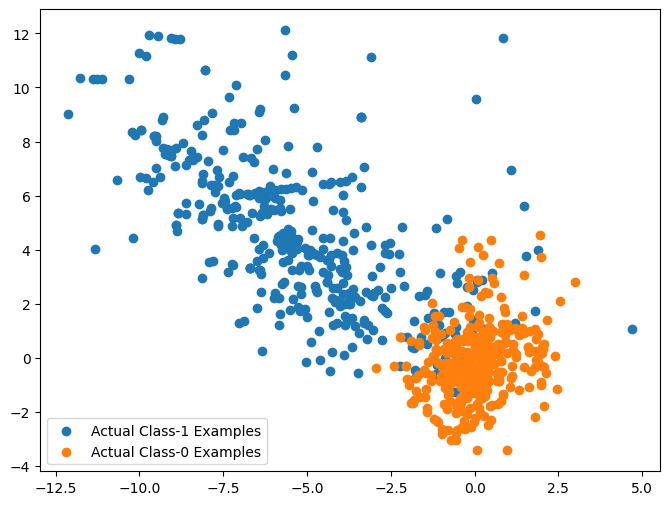

In [ ]:
var_imp = []
for i in clf.feature_importances_:
    var_imp.append(i)
print('Top var =', var_imp.index(np.sort(clf.feature_importances_)[-1])+1)
print('2nd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-2])+1)
print('3rd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-3])+1)

# Variable on Index-13 and Index-9 seems to be the top 2 variables
top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-1])
second_top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-2])

X_train_1 = X_train[np.where(y_train==1.0)]
X_train_0 = X_train[np.where(y_train==0.0)]

np.random.shuffle(X_train_0)

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [8, 6]

plt.scatter(X_train_1[:, top_var_index], X_train_1[:, second_top_var_index], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], top_var_index], X_train_0[:X_train_1.shape[0], second_top_var_index],
            label='Actual Class-0 Examples')
plt.legend()

In [ ]:
#### Print the FPR,TPR & select the best threshold from the roc curve
from sklearn import metrics

# Function to print FPR, TPR and select the best threshold
def print_best_threshold(model, X_train, y_train, X_test, y_test):
    # Predict probabilities
    y_train_prob = model.predict_proba(X_train)[:, 1]
    y_test_prob = model.predict_proba(X_test)[:, 1]

    # Calculate ROC AUC for train set
    train_auc = metrics.roc_auc_score(y_train, y_train_prob)
    print('Train AUC =', train_auc)

    # Calculate FPR, TPR and thresholds for ROC curve
    fpr, tpr, thresholds = metrics.roc_curve(y_test, y_test_prob)

    # Select the best threshold where the difference (TPR - FPR) is maximum
    threshold = thresholds[np.argmax(tpr - fpr)]
    print('Best Threshold =', threshold)

    return fpr, tpr, threshold


In [ ]:
# print('Train auc =', metrics.roc_auc_score(_________)
# fpr, tpr, thresholds = metrics.roc_curve(_________)
# threshold = thresholds[np.argmax(tpr-fpr)]
# print(threshold)
fpr, tpr, threshold = print_best_threshold(models[2][1], X_train_smote, y_train_smote, X_test, y_test)

Train AUC = 1.0
Best Threshold = 0.0003088226
